<a href="https://colab.research.google.com/github/leeeeegayeon/queue_HW/blob/main/AISrvDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets

d=datasets.load_iris() # iris 데이터셋을 읽고
print(d.DESCR) # 내용을 출력
for i in range(0,len(d.data)): # 샘플을 순서대로 출력
    print(i+1,d.data[i],d.target[i])
from sklearn import svm

s=svm.SVC(gamma=0.1,C=10) # svm 분류 모델 SVC 객체 생성하고
s.fit(d.data,d.target) # iris 데이터로 학습

new_d=[[6.4,3.2,6.0,2.5],[7.1,3.1,4.7,1.35]] # 101번째와 51번째 샘플을 변형하여 새로운 데이터 생성
res=s.predict(new_d)
print("새로운 2개 샘플의 부류는", res)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species') # petal_length를 제외하여 3차원 공간 구성
fig.show()

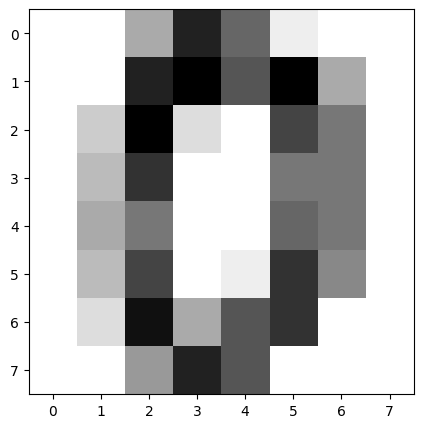

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
이 숫자는  0 입니다.


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

digit=datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[0],cmap=plt.cm.gray_r,interpolation='nearest') # 0번 샘플을 그림
plt.show()
print(digit.data[0]) # 0번 샘플의 화솟값을 출력
print("이 숫자는 ",digit.target[0],"입니다.")

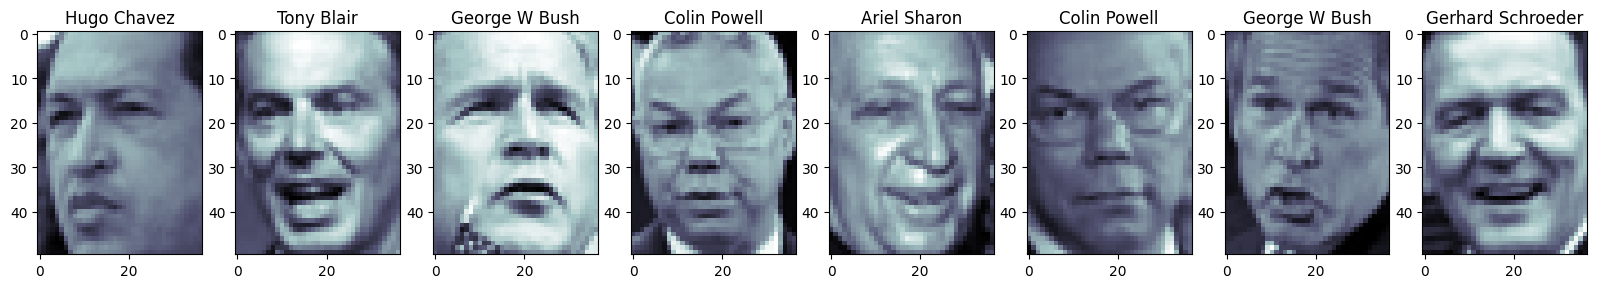

In [ ]:

lfw=datasets.fetch_lfw_people(min_faces_per_person=70,resize=0.4) # 데이터셋 읽기

plt.figure(figsize=(20,5))

for i in range(8): # 처음 8명을 디스플레이
    plt.subplot(1,8,i+1)
    plt.imshow(lfw.images[i],cmap=plt.cm.bone)
    plt.title(lfw.target_names[lfw.target[i]])

plt.show()

In [ ]:

news=datasets.fetch_20newsgroups(subset='train') # 데이터셋 읽기
print("*****\n",news.data[0],"\n*****") # 0번 샘플 출력
print("이 문서의 부류는 <",news.target_names[news.target[0]],"> 입니다.")

*****
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 
*****
이 문서의 부류는 < rec.autos > 입니다.


In [ ]:
from sklearn import datasets
from sklearn import svm

digit=datasets.load_digits()

# svm의 분류기 모델 SC를 학습
s=svm.SVC(gamma=0.1,C=10)
s.fit(digit.data,digit.target) # digit 데이터로 모델링

# 훈련 집합의 앞에 있는 샘플 3개를 새로운 샘플로 간주하고 인식해봄
new_d=[digit.data[0],digit.data[1],digit.data[2]]
res=s.predict(new_d)
print("예측값은", res)
print("참값은", digit.target[0],digit.target[1],digit.target[2])

# 훈련 집합을 테스트 집합으로 간주하여 인식해보고 정확률을 측정
res=s.predict(digit.data)
correct=[i for i in range(len(res)) if res[i]==digit.target[i]]
accuracy=len(correct)/len(res)
print("화소 특징을 사용했을 때 정확률=",accuracy*100, "%")

예측값은 [0 1 2]
참값은 0 1 2
화소 특징을 사용했을 때 정확률= 100.0 %


In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# svm의 분류 모델 SVC를 학습
s=svm.SVC(gamma=0.001)
s.fit(x_train,y_train)

res=s.predict(x_test)

# 혼동 행렬 구함
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 측정하고 출력
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

[[66.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 80.  0.  0.  0.  0.  0.  0.  2.  0.]
 [ 0.  0. 82.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 70.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 72.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0. 73.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 68.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 64.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 68.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0. 67.]]
테스트 집합에 대한 정확률은 98.74826147426981 %입니다.


In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

digit=datasets.load_digits()
s=svm.SVC(gamma=0.001)
accuracies=cross_val_score(s,digit.data,digit.target,cv=5) # 5-겹 교차 검증

print(accuracies)
print("정확률(평균)=%0.3f, 표준편차 =%0.3f"%(accuracies.mean()*100,accuracies.std()))

[0.975      0.95       0.98328691 0.99164345 0.96100279]
정확률(평균)=97.219, 표준편차 =0.015
